<a href="https://www.kaggle.com/code/pollukenpinedo/house-prices-eda?scriptVersionId=163937484" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# About The team

Team members:
* Anaelle 
* Santiago 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Load data
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
# Preview data
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
#Finally we change de NaN values to Cero
train.fillna(0, inplace=True)

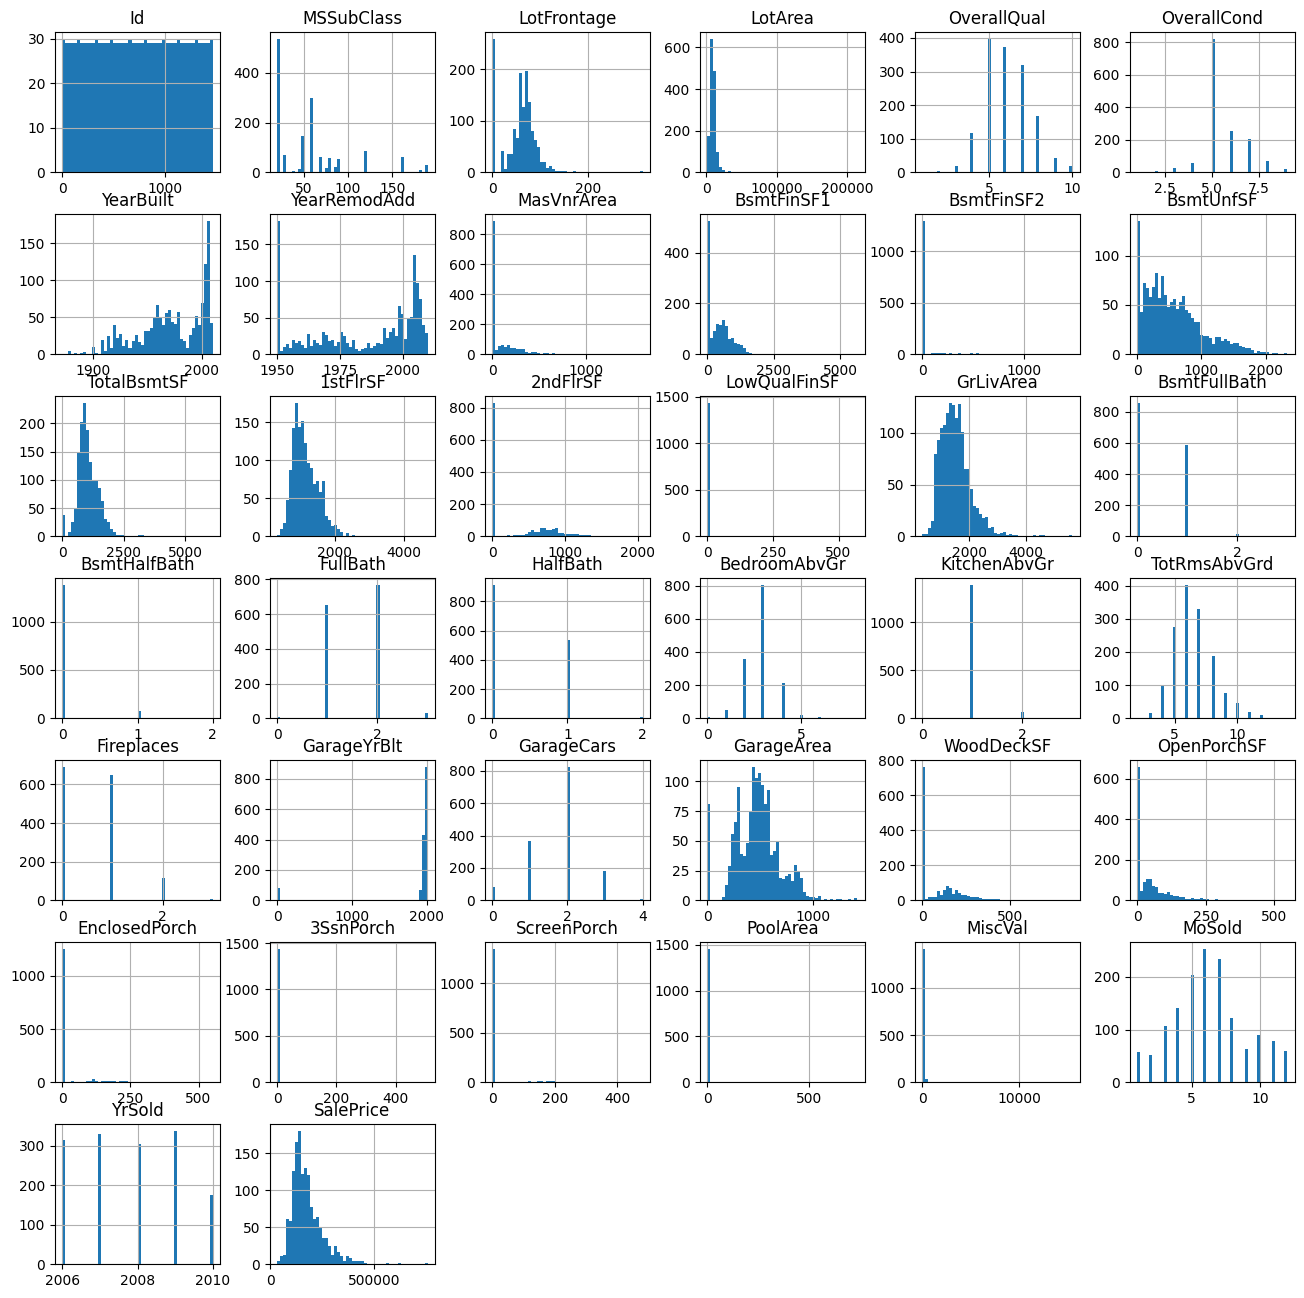

In [6]:
# Chart overview
train.hist(bins=50, figsize=(16,16))
plt.show()

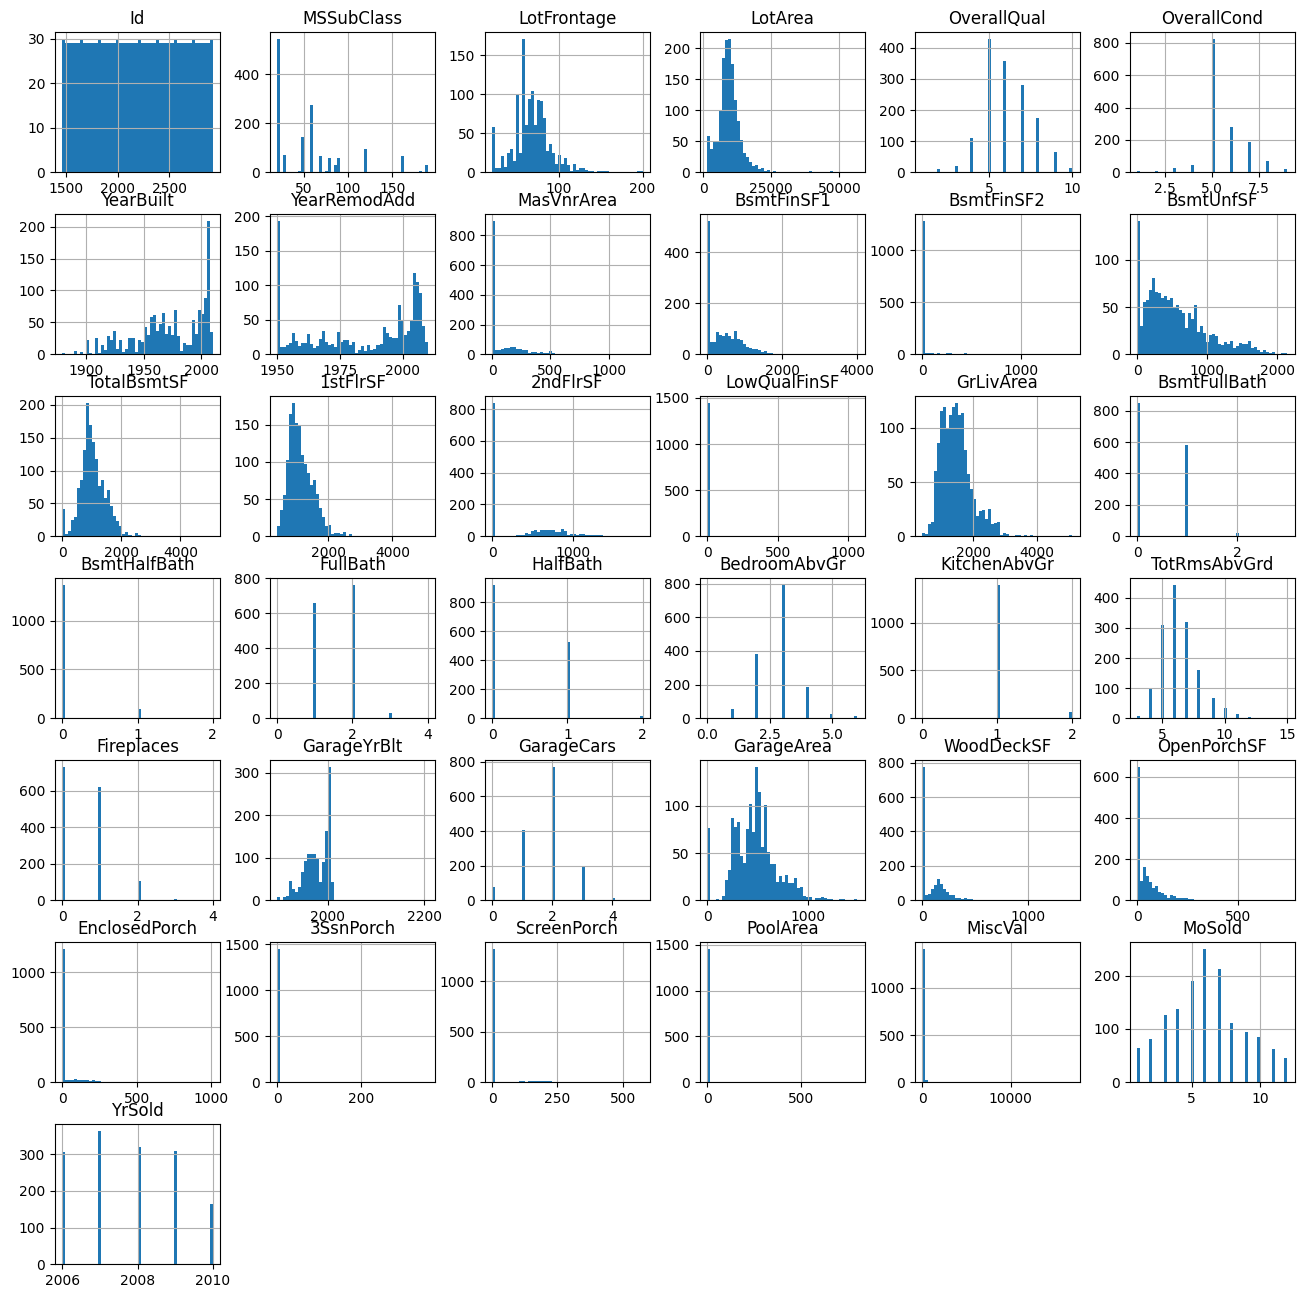

In [7]:
# Chart overview
test.hist(bins=50, figsize=(16,16))
plt.show()

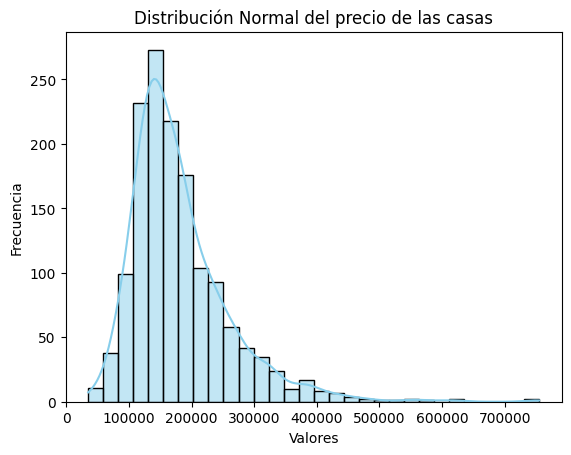

In [8]:
# Crear el gráfico de distribución (campana de Gauss)
sns.histplot(train.SalePrice, kde=True, color='skyblue', bins=30)

# Personalizar el gráfico
plt.title('Distribución Normal del precio de las casas')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico 
plt.show()

#Grafico para mostrar la distribucion de los precios de las casas

In [9]:
print(train.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


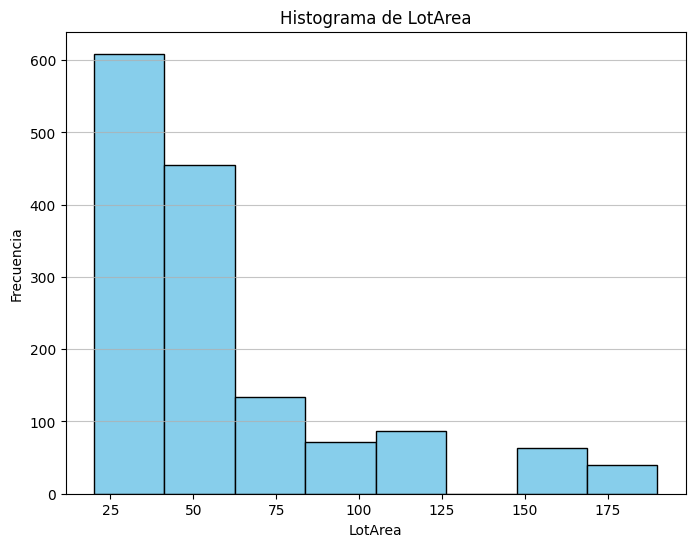

In [10]:
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(train.MSSubClass,bins =8, color='skyblue', edgecolor='black')
# Personalizar el histograma
plt.title(f'Histograma de LotArea')
plt.xlabel('LotArea')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

# Mostrar el histograma
plt.show()

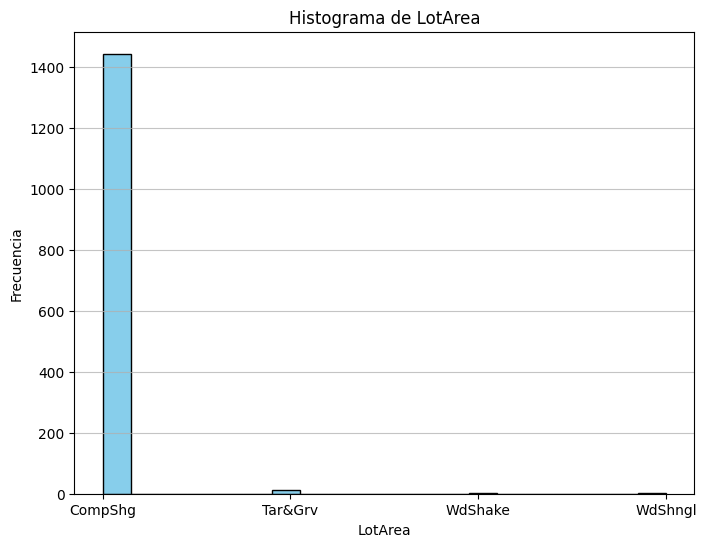

In [11]:
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(test.RoofMatl,bins =20, color='skyblue', edgecolor='black')
# Personalizar el histograma
plt.title(f'Histograma de LotArea')
plt.xlabel('LotArea')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

# Mostrar el histograma
plt.show()

In [12]:
#Resumen estadistico
summary_stats = train.describe()
print(summary_stats)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    57.623288   10516.828082     6.099315   
std     421.610009    42.300571    34.664304    9981.264932     1.382997   
min       1.000000    20.000000     0.000000    1300.000000     1.000000   
25%     365.750000    20.000000    42.000000    7553.500000     5.000000   
50%     730.500000    50.000000    63.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.117123   443.639726  ...   
std       1.112799    30.202904     20.645407   180.731373   456.098091  ..

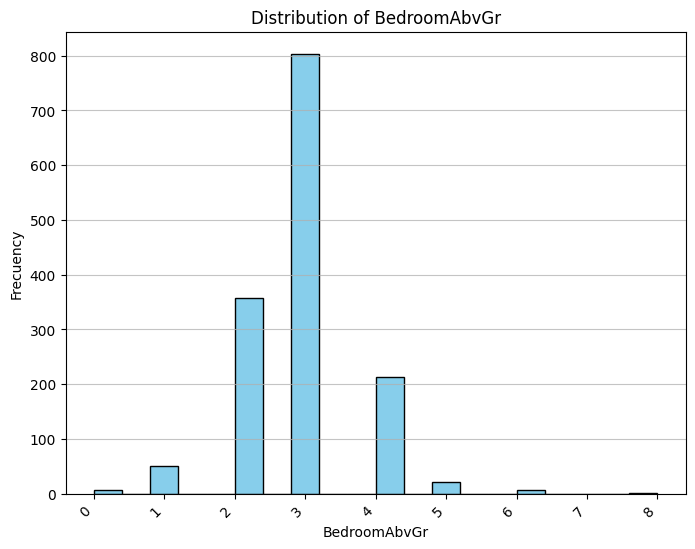

In [13]:
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(train.BedroomAbvGr,bins =20, color='skyblue', edgecolor='black')
# Personalizar el histograma
plt.title(f'Distribution of BedroomAbvGr')
plt.xlabel('BedroomAbvGr')
plt.ylabel('Frecuency')
plt.grid(axis='y', alpha=0.75)
# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')
# Mostrar el histograma
plt.show()

# Exploring no numeric variables

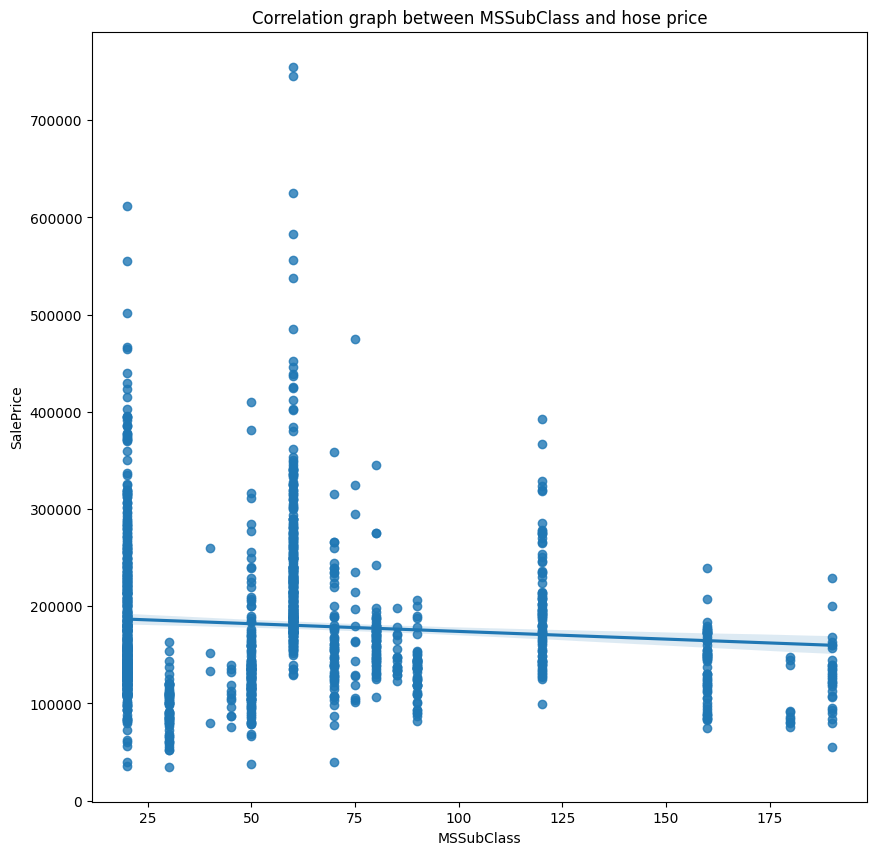

In [14]:

#Graph
plt.figure(figsize=(10,10))
sns.regplot(x='MSSubClass', y='SalePrice',data= train)

#Personalizacion del grafico
plt.title('Correlation graph between MSSubClass and hose price')
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')

plt.show()

### Neighborhood Distribution


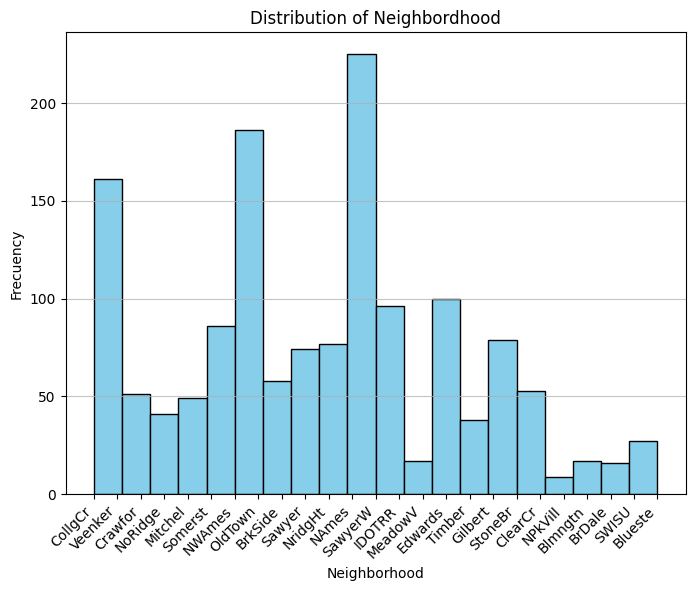

In [15]:
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(train.Neighborhood,bins =20, color='skyblue', edgecolor='black')
# Personalizar el histograma
plt.title(f'Distribution of Neighbordhood')
plt.xlabel('Neighborhood')
plt.ylabel('Frecuency')
plt.grid(axis='y', alpha=0.75)
# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')
# Mostrar el histograma
plt.show()

In [16]:
train['Numeric_neighborhood'] = train['Neighborhood'].astype('category').cat.codes
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Numeric_neighborhood
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,5,2007,WD,Normal,181500,24
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,9,2008,WD,Normal,223500,5
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,2,2006,WD,Abnorml,140000,6
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,12,2008,WD,Normal,250000,15


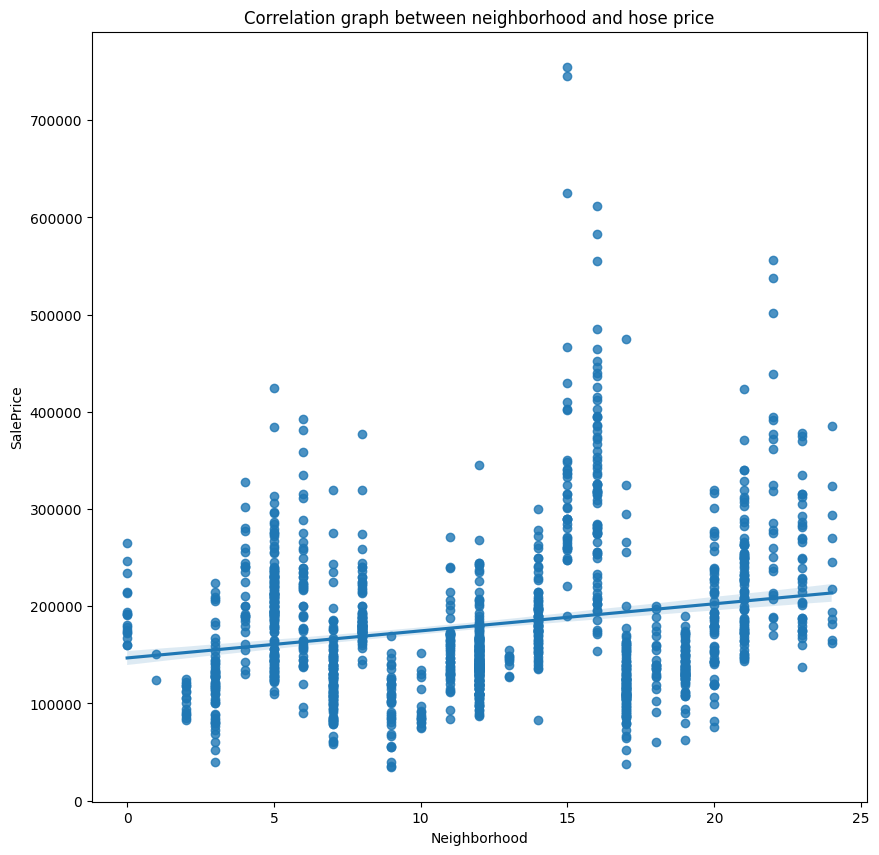

In [17]:

#Graph
plt.figure(figsize=(10,10))
sns.regplot(x='Numeric_neighborhood', y='SalePrice',data= train)

#Personalizacion del grafico
plt.title('Correlation graph between neighborhood and hose price')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')

plt.show()

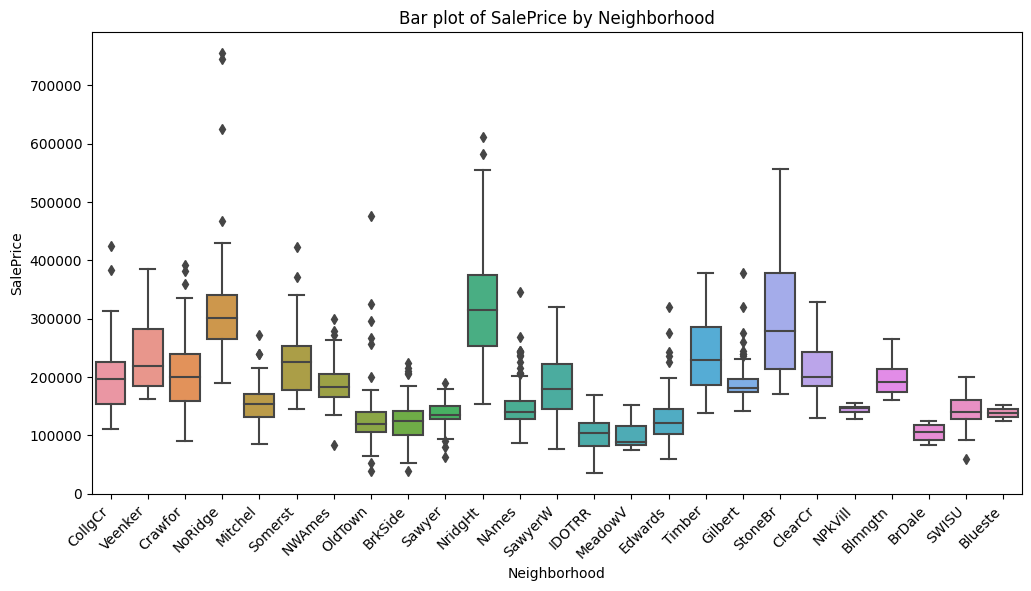

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)

# Personalización del gráfico
plt.title('Bar plot of SalePrice by Neighborhood')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


In [19]:
!pip install sweetviz

  Obtaining dependency information for sweetviz from https://files.pythonhosted.org/packages/89/50/8d3f7ca820267a38b42c64778db0f186d85cec6e3f0c5210eab9c16e783f/sweetviz-2.3.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 52.6 MB/s eta 0:00:00:00:0100:01


---
To explore al th variables at the same time we use the sweetviz library.
With these Library we are ready to choose some variables thate could be more relevants to use for the training of the model.

---

In [ ]:
import sweetviz as sv

report =sv.analyze(train)
report.show_html("overview_report.html") # Mostrar y guardar el informe en un archivo HTML

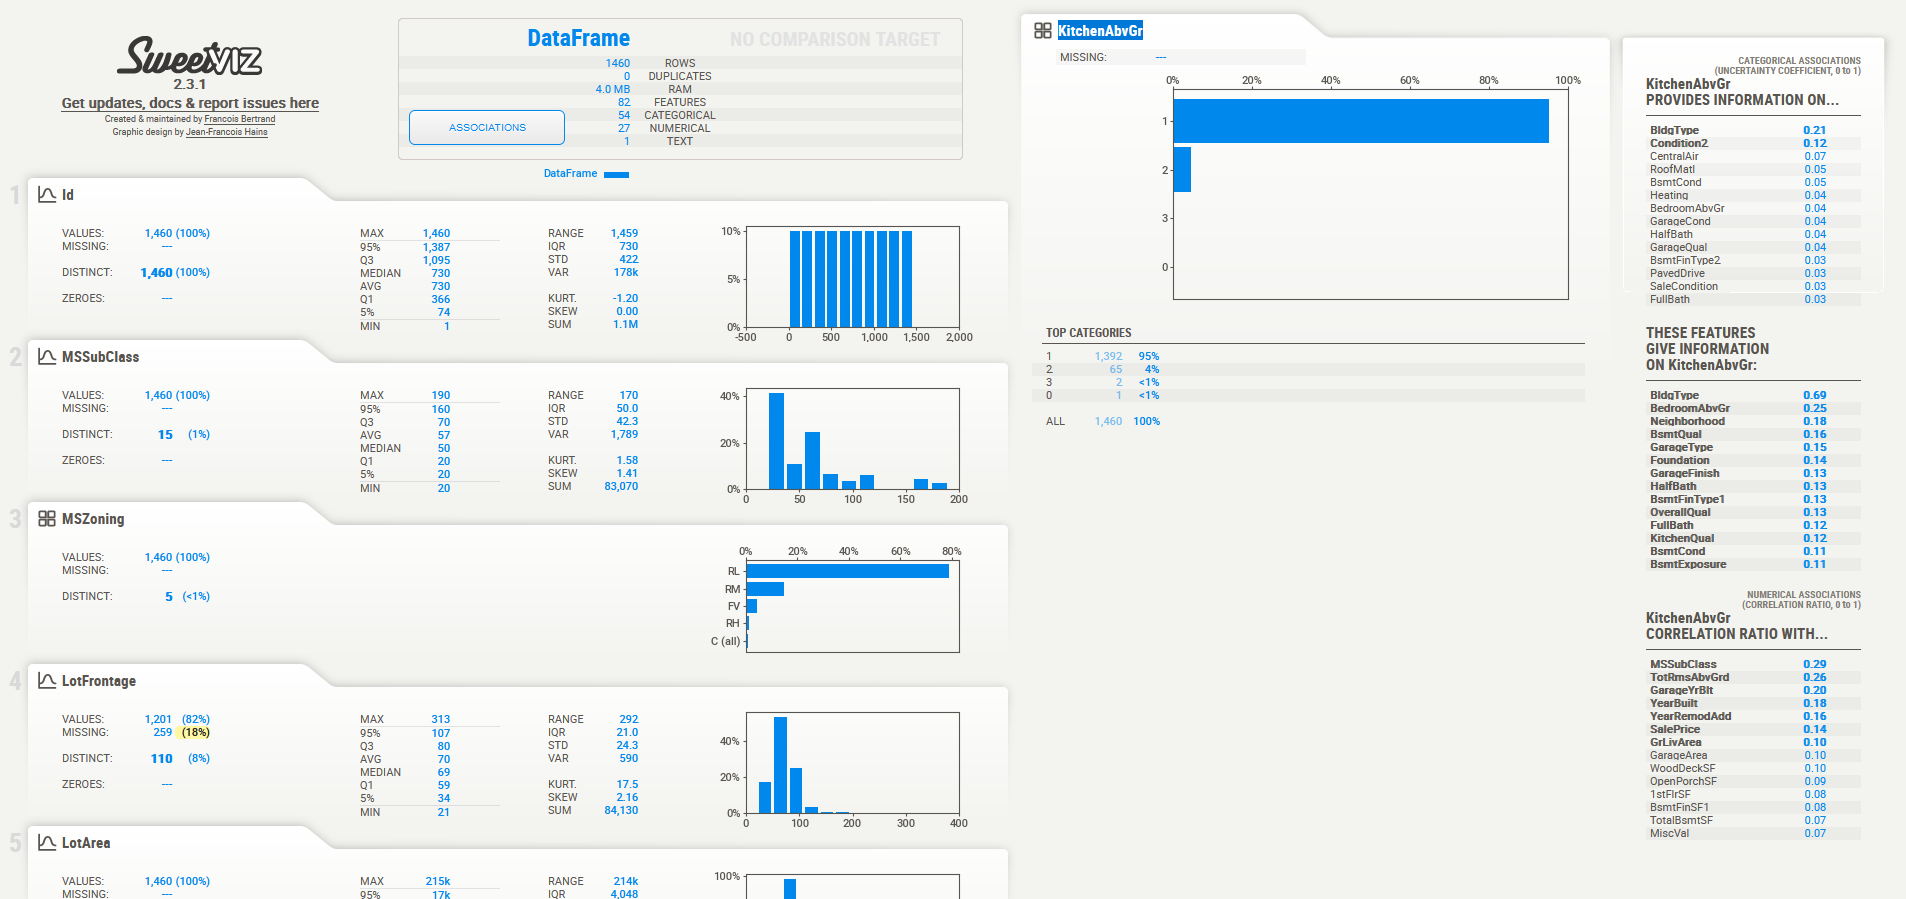

# Constructing new data Set For Train

After we choose the most relevant variables (those that have more than 0.6 of correlation ratio with sale Price) 
we're going to make the new data set for the training model first iteration.

In [60]:
selected_columns = ['Neighborhood', 'OverallQual', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'KitchenQual', 'GarageCars', 'GarageArea','GrLivArea','YearBuilt','FullBath']
x_train_1 = train[selected_columns]
x_train_1.head()

,Neighborhood,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,GarageCars,GarageArea,GrLivArea,YearBuilt,FullBath
0,CollgCr,7,Gd,Gd,856,856,1710,Gd,2,548,1710,2003,2
1,Veenker,6,TA,Gd,1262,1262,1262,TA,2,460,1262,1976,2
2,CollgCr,7,Gd,Gd,920,920,1786,Gd,2,608,1786,2001,2
3,Crawfor,7,TA,TA,756,961,1717,Gd,3,642,1717,1915,1
4,NoRidge,8,Gd,Gd,1145,1145,2198,Gd,3,836,2198,2000,2


In [62]:
#Seleccionar la columna de salida para el y_train (output)
y_train_1 = train['SalePrice']
print(y_train_1)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


# Applying data transforming

Now we have to make a data transformation for some columns, we can see that the columns ExterQual, BsmtQual, KitchenQual are examples of ordinal variables.
So we should convert them into numeric values.

In [63]:
#Haciendo un mapping  de las variables   Ex	5 Gd	4  TA	3 Fa	2 Po	1
exterQual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1
}

x_train_1.loc[:, 'ExterQual'] = x_train_1['ExterQual'].map(exterQual_mapping)
x_train_1.head()

,Neighborhood,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,GarageCars,GarageArea,GrLivArea,YearBuilt,FullBath
0,CollgCr,7,4,Gd,856,856,1710,Gd,2,548,1710,2003,2
1,Veenker,6,3,Gd,1262,1262,1262,TA,2,460,1262,1976,2
2,CollgCr,7,4,Gd,920,920,1786,Gd,2,608,1786,2001,2
3,Crawfor,7,3,TA,756,961,1717,Gd,3,642,1717,1915,1
4,NoRidge,8,4,Gd,1145,1145,2198,Gd,3,836,2198,2000,2


In [64]:
#Haciendo un mapping  de las variables   Ex	5 Gd	4  TA	3 Fa	2 Po	1 NA -> 0
BsmtQual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1,
    'NA' : 0
}

x_train_1.loc[:, 'BsmtQual'] = x_train_1['BsmtQual'].map(exterQual_mapping)
x_train_1.head()

,Neighborhood,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,GarageCars,GarageArea,GrLivArea,YearBuilt,FullBath
0,CollgCr,7,4,4.0,856,856,1710,Gd,2,548,1710,2003,2
1,Veenker,6,3,4.0,1262,1262,1262,TA,2,460,1262,1976,2
2,CollgCr,7,4,4.0,920,920,1786,Gd,2,608,1786,2001,2
3,Crawfor,7,3,3.0,756,961,1717,Gd,3,642,1717,1915,1
4,NoRidge,8,4,4.0,1145,1145,2198,Gd,3,836,2198,2000,2


In [65]:
#Haciendo un mapping  de las variables   Ex	5 Gd	4  TA	3 Fa	2 Po	1
KitchenQual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1
}

x_train_1.loc[:, 'KitchenQual'] = x_train_1['KitchenQual'].map(exterQual_mapping)
x_train_1.head()

,Neighborhood,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,GarageCars,GarageArea,GrLivArea,YearBuilt,FullBath
0,CollgCr,7,4,4.0,856,856,1710,4,2,548,1710,2003,2
1,Veenker,6,3,4.0,1262,1262,1262,3,2,460,1262,1976,2
2,CollgCr,7,4,4.0,920,920,1786,4,2,608,1786,2001,2
3,Crawfor,7,3,3.0,756,961,1717,4,3,642,1717,1915,1
4,NoRidge,8,4,4.0,1145,1145,2198,4,3,836,2198,2000,2


# Dividiendo el set TRAIN
---
Dividimos el set de datos en 2 paara obtener un conjunto de entrenamiento y otro de prueba con salidas reales y poder medir el desempeno del modelo.
---

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_train_1, y_train_1, test_size=0.2, random_state=42)

# Appliying One Hote encoding to Neighborhood Column

In [67]:
# One-hot encoding for Neighborhood column
X_train = pd.get_dummies(X_train, columns=['Neighborhood'], prefix=['nom'])

# Only select boolean columns
columnas_booleanas = X_train.select_dtypes(include=bool).columns

# Convert to binary code
X_train[columnas_booleanas] = X_train[columnas_booleanas].astype(int)

X_train.head()

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,GarageCars,GarageArea,GrLivArea,...,nom_NoRidge,nom_NridgHt,nom_OldTown,nom_SWISU,nom_Sawyer,nom_SawyerW,nom_Somerst,nom_StoneBr,nom_Timber,nom_Veenker
254,5,3,3.0,1314,1314,1314,3,1,294,1314,...,0,0,0,0,0,0,0,0,0,0
1066,6,4,4.0,799,799,1571,3,2,380,1571,...,0,0,0,0,0,0,0,0,0,0
638,5,3,2.0,796,796,796,3,0,0,796,...,0,0,0,0,0,0,0,0,0,0
799,5,3,4.0,731,981,1768,4,1,240,1768,...,0,0,0,1,0,0,0,0,0,0
380,5,3,3.0,1026,1026,1691,4,1,308,1691,...,0,0,0,1,0,0,0,0,0,0


In [68]:
# One-hot encoding for Neighborhood column
X_test = pd.get_dummies(X_test, columns=['Neighborhood'], prefix=['nom'])

# Only select boolean columns
columnas_booleanas = X_test.select_dtypes(include=bool).columns

# Convert to binary code
X_test[columnas_booleanas] = X_test[columnas_booleanas].astype(int)

X_test.head()

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,GarageCars,GarageArea,GrLivArea,...,nom_NoRidge,nom_NridgHt,nom_OldTown,nom_SWISU,nom_Sawyer,nom_SawyerW,nom_Somerst,nom_StoneBr,nom_Timber,nom_Veenker
892,6,3,3.0,1059,1068,1068,3,1,264,1068,...,0,0,0,0,1,0,0,0,0,0
1105,8,4,5.0,1463,1500,2622,4,2,712,2622,...,1,0,0,0,0,0,0,0,0,0
413,5,3,3.0,1008,1028,1028,3,2,360,1028,...,0,0,1,0,0,0,0,0,0,0
522,6,3,3.0,1004,1004,1664,3,2,420,1664,...,0,0,0,0,0,0,0,0,0,0
1036,9,4,5.0,1620,1620,1620,5,3,912,1620,...,0,0,0,0,0,0,0,0,1,0


In [69]:
y_test.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

In [70]:
# Unir el DataFrame de características y el DataFrame de destino
X_train = pd.concat([X_train, y_train], axis=1)
X_train.head()

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,GarageCars,GarageArea,GrLivArea,...,nom_NridgHt,nom_OldTown,nom_SWISU,nom_Sawyer,nom_SawyerW,nom_Somerst,nom_StoneBr,nom_Timber,nom_Veenker,SalePrice
254,5,3,3.0,1314,1314,1314,3,1,294,1314,...,0,0,0,0,0,0,0,0,0,145000
1066,6,4,4.0,799,799,1571,3,2,380,1571,...,0,0,0,0,0,0,0,0,0,178000
638,5,3,2.0,796,796,796,3,0,0,796,...,0,0,0,0,0,0,0,0,0,85000
799,5,3,4.0,731,981,1768,4,1,240,1768,...,0,0,1,0,0,0,0,0,0,175000
380,5,3,3.0,1026,1026,1691,4,1,308,1691,...,0,0,1,0,0,0,0,0,0,127000


In [71]:
X_train.shape

(1168, 38)

In [72]:
X_test.shape

(292, 37)

## Create and Train Model

In [73]:
import pandas as pd
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Convertir el DataFrame de pandas a TensorFlow Dataset
train_data_tfdf = tfdf.keras.pd_dataframe_to_tf_dataset(X_train, task=tfdf.keras.Task.REGRESSION, label="SalePrice")
test_data_tfdf = tfdf.keras.pd_dataframe_to_tf_dataset(X_test, task=tfdf.keras.Task.REGRESSION, label=None)
# Definir el modelo RandomForest
model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION, 
                                     num_trees=500,
                                     min_examples=10,
                                    )

# Compilar el modelo
model.compile(metrics=["mse"])

# Entrenar el modelo
model.fit(train_data_tfdf)

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [ ]:
# Plot Model
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

In [ ]:
# Visualize Model
import matplotlib.pyplot as plt
logs = model.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [ ]:
# Inspect Model
inspector = model.make_inspector()
inspector.evaluation()

In [ ]:
# Evaluate Model using validation dataset
evaluation = model.evaluate(x=train_data_tfdf,return_dict=True)

for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")

In [ ]:
# Check model predictions contributions
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
    print("\t", importance)

In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

In [ ]:
# Realizar predicciones en el conjunto de prueba
predictions = model.predict(test_data_tfdf)

In [ ]:
# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Graficar valores predichos contra valores originales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Valores Predichos vs. Valores Originales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de Regresión')
plt.xlabel('Valores Originales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.show()

# Procesing the Test DataSet

In [ ]:
selected_columns = ['OverallQual','Neighborhood','GrLivArea','GarageCars','ExterQual','BsmtQual','KitchenQual','GarageArea','TotalBsmtSF','1stFlrSF']
x_test_1 = test[selected_columns]
x_test_1.head()

In [ ]:
#Haciendo un mapping  de las variables   Ex	5 Gd	4  TA	3 Fa	2 Po	1
exterQual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1
}

x_test_1.loc[:, 'ExterQual'] = x_test_1['ExterQual'].map(exterQual_mapping)
x_test_1.head()

In [ ]:
#Haciendo un mapping  de las variables   Ex	5 Gd	4  TA	3 Fa	2 Po	1 NA -> 0
BsmtQual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1,
    'NA' : 0
}

x_test_1.loc[:, 'BsmtQual'] = x_test_1['BsmtQual'].map(exterQual_mapping)
x_test_1.head()

In [ ]:
#Haciendo un mapping  de las variables   Ex	5 Gd	4  TA	3 Fa	2 Po	1
KitchenQual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1
}

x_test_1.loc[:, 'KitchenQual'] = x_test_1['KitchenQual'].map(exterQual_mapping)
x_test_1.head()

In [ ]:
#Finally we change de NaN values to Cero
x_test_1.fillna(0, inplace=True)

In [ ]:
# One-hot encoding for Neighborhood column
x_test_1 = pd.get_dummies(x_test_1, columns=['Neighborhood'], prefix=['nom'])

# Only select boolean columns
columnas_booleanas = x_test_1.select_dtypes(include=bool).columns

# Convert to binary code
x_test_1[columnas_booleanas] = x_test_1[columnas_booleanas].astype(int)

x_test_1.head()

In [ ]:
# Run test dataset through model
test_file_path = "/kaggle/input/house-prices-advanced-regression-techniques/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(x_test_1,task = tfdf.keras.Task.REGRESSION, label=None)

preds = model.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()